# HOUSE PRICE PREDICTION FOR HOUSES IN  KOCHI

In [1]:
#Author -kumar abhinav
#date-30/07/2018
print ("Starting ML Engines...")
import pandas as pd
print ("Pandas version", pd.__version__)
import numpy as np
print ("Numpy version", np.__version__)
import sklearn as sk
print ("Sci-kit learn version", sk.__version__)
print ("ML Engines are loaded..")

Starting ML Engines...
Pandas version 0.20.3
Numpy version 1.13.3
Sci-kit learn version 0.19.1
ML Engines are loaded..


## loading all necessary libraries for doing modelling 
- Data is collected from various sites like magicbricks,99acres.com
- proposed modelling is in these steps
 - Feature description
 - Data cleaning
 - outlier detection and removal
 - Regression techniques for fitting of data
 - testing using different metrics to calculate accuracy

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [3]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\AnacondaProjects\\TCS_project'

## Loading the data for House prices

In [4]:
house_data=pd.read_csv("2Cleaned_HP.csv")

In [5]:
house_data.iloc[0:11,:]

,id,sqft,bhk,type,neighbourhood,location,price
0,1,3092,3,Flat/Apartment,Purva Oceana,Marine Drive,31800000
1,2,1830,3,Flat/Apartment,Livit Harmony,Aluva,7800000
2,3,1654,3,Flat/Apartment,DD Highway Proxima,Kundanoor,7600000
3,4,2595,3,Flat/Apartment,Marina One,Marine Drive,23300000
4,5,1799,3,Flat/Apartment,Kalista,Kakkanad,8190000
5,6,973,2,Flat/Apartment,Trinity Citadel,Kadavanthra,6290000
6,7,910,2,Flat/Apartment,Airport Greens,Aluva,3350000
7,8,1419,3,Flat/Apartment,EV Kingston Towers,Aluva,6100000
8,9,1875,3,Flat/Apartment,Noel Song,Kadavanthra,10800000
9,10,130,3,Villa,Kakkanad,Kochi,6100000


In [6]:
house_data.shape

(1880, 7)

# FEATURE DESCRIPTION
 - id : id is genereated for uniquely identifying the each row of data after train and test split
 - sqft : area of the plot in square feet
 - bhk : no of bathroom/kitchen/hall in the plot
 - neighbourhood : gives description about the neighbourhood/ locality of house
 - location : simply location of house
 - price : this is the label for which we will be predicting.

In [7]:
house_data.dtypes

id                int64
sqft              int64
bhk              object
type             object
neighbourhood    object
location         object
price             int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Spliiting data into train and test for calculating accuracy 70:30

In [9]:
X_train, X_test, y_train, y_test = train_test_split(house_data.iloc[:,0:6],house_data.price, random_state=0)

In [10]:
print(" shape of x_train {}\n shape of x_test {} \n shape of y_train {} \n shape of y_test {} ".format(
X_train.shape, X_test.shape, y_train.shape, y_test.shape))

 shape of x_train (1410, 6)
 shape of x_test (470, 6) 
 shape of y_train (1410,) 
 shape of y_test (470,) 


In [11]:
#X_train =  pd.DataFrame(X_train)
#y_train =  pd.DataFrame(y_train)
#X_test =  pd.DataFrame(X_test)
#y_test =  pd.DataFrame(y_test)

In [12]:
y_train.head()

1339     5800000
977     12500000
1415     5000000
1355     5000000
1593    30000000
Name: price, dtype: int64

In [13]:
y_test.head()

511     5000000
124     8800000
217     3850000
1426    6980000
891     6500000
Name: price, dtype: int64

## Exploratory Data Analysis 
### Here we will look for statistics of data rows and columns 
### Summary of test and train dataset

In [14]:
X_train.describe()

,id,sqft
count,1410.000000,1410.000000
mean,951.549645,1657.835461
std,542.532228,791.357927
min,1.000000,10.000000
25%,481.500000,1200.000000
50%,953.500000,1512.000000
75%,1422.750000,1899.000000
max,1879.000000,5000.000000


In [15]:
X_test.describe()

,id,sqft
count,470.000000,470.000000
mean,907.351064,1628.517021
std,543.045034,823.768939
min,2.000000,10.000000
25%,448.500000,1100.000000
50%,898.500000,1500.000000
75%,1372.500000,1942.000000
max,1880.000000,5000.000000


In [16]:
y_train.describe()

count    1.410000e+03
mean     1.010894e+07
std      1.014687e+07
min      2.000000e+06
25%      5.500000e+06
50%      7.500000e+06
75%      1.250000e+07
max      2.000000e+08
Name: price, dtype: float64

In [17]:
y_test.describe()

count    4.700000e+02
mean     9.400745e+06
std      6.698221e+06
min      1.800000e+06
25%      5.200000e+06
50%      7.500000e+06
75%      1.150000e+07
max      5.000000e+07
Name: price, dtype: float64

## Account for categorical variables 
 ### clearly it has 4 categorical variables to be handled seperately

In [18]:
#categorical variables
categorical_variables=X_train.dtypes.loc[X_train.dtypes=='object'].index
print(categorical_variables)

Index(['bhk', 'type', 'neighbourhood', 'location'], dtype='object')


In [19]:
#no of unique values
X_train[categorical_variables].apply(lambda x:len(x.unique()))

bhk              10
type              8
neighbourhood    78
location         16
dtype: int64

In [20]:
#value_counts()
X_train['bhk'].value_counts()

3          661
2          347
4          311
5           43
 Studio     13
10          12
 >           8
6            6
1            5
8            4
Name: bhk, dtype: int64

In [21]:
X_train['bhk'].value_counts()/X_train.shape[0]

3          0.468794
2          0.246099
4          0.220567
5          0.030496
 Studio    0.009220
10         0.008511
 >         0.005674
6          0.004255
1          0.003546
8          0.002837
Name: bhk, dtype: float64

In [22]:
X_train['type'].value_counts()

 Apartment         697
 House             424
 Villa             194
 Builder            39
 Penthouse          20
 Flat/Apartment     15
 for                13
 BHK                 8
Name: type, dtype: int64

In [23]:
X_train['type'].value_counts()/X_train.shape[0]

 Apartment         0.494326
 House             0.300709
 Villa             0.137589
 Builder           0.027660
 Penthouse         0.014184
 Flat/Apartment    0.010638
 for               0.009220
 BHK               0.005674
Name: type, dtype: float64

In [24]:
X_train['neighbourhood'].value_counts()

 Kochi                      347
 DLF New Town Heights       120
 Thrippunithura              82
 Kakkanad                    75
 Kaloor                      52
 Vazhakkala                  42
 Aluva                       30
 Vyttila                     29
 Lisy Junction               28
 Skyline Spectra             27
 Nedumbassery                25
 Jairaj Spectrum             25
 Netoor                      25
 Asset E Valley              24
 Kristal Ruby                24
 Glass House                 23
 Noel Signature              23
 Kandanad                    22
 Green Vistas Prakrriti      21
 Kundanoor                   21
 Ebony Estate                21
 Edappally                   20
 Vypin                       18
 South Chittoor Road         14
 Puthen Krishu               14
 Kangarappady                14
 Trinity High Grove          14
 Athani                      14
 Aqua City                   13
 Palarivattom                13
                           ... 
 Puravan

In [25]:
X_train['neighbourhood'].value_counts()/X_train.shape[0]

 Kochi                      0.246099
 DLF New Town Heights       0.085106
 Thrippunithura             0.058156
 Kakkanad                   0.053191
 Kaloor                     0.036879
 Vazhakkala                 0.029787
 Aluva                      0.021277
 Vyttila                    0.020567
 Lisy Junction              0.019858
 Skyline Spectra            0.019149
 Nedumbassery               0.017730
 Jairaj Spectrum            0.017730
 Netoor                     0.017730
 Asset E Valley             0.017021
 Kristal Ruby               0.017021
 Glass House                0.016312
 Noel Signature             0.016312
 Kandanad                   0.015603
 Green Vistas Prakrriti     0.014894
 Kundanoor                  0.014894
 Ebony Estate               0.014894
 Edappally                  0.014184
 Vypin                      0.012766
 South Chittoor Road        0.009929
 Puthen Krishu              0.009929
 Kangarappady               0.009929
 Trinity High Grove         0.009929
 

In [26]:
X_train['location'].value_counts()

 Kochi             958
 Kakkanad          217
 Thrikkakara       106
 Aluva              28
 Vyttila            24
 Kaloor             24
 Kadavanthra        16
 Thrippunithura     12
 Angamali            6
 Vazhakkala          6
 Alwaye              4
 Kalamasery          2
 Kundanoor           2
 Edappally           2
 Marine Drive        2
 Kolenchery          1
Name: location, dtype: int64

In [27]:
X_train['location'].value_counts()/X_train.shape[0]

 Kochi             0.679433
 Kakkanad          0.153901
 Thrikkakara       0.075177
 Aluva             0.019858
 Vyttila           0.017021
 Kaloor            0.017021
 Kadavanthra       0.011348
 Thrippunithura    0.008511
 Angamali          0.004255
 Vazhakkala        0.004255
 Alwaye            0.002837
 Kalamasery        0.001418
 Kundanoor         0.001418
 Edappally         0.001418
 Marine Drive      0.001418
 Kolenchery        0.000709
Name: location, dtype: float64

## Cleaning data 
- for bhk as new 'studio' and '>' are new category which needs to imputed by mode of their category
- for type as new 'for' and 'bhk' are new category which also be imputed by mode of type category
as these are not relevant to modelling


## Creating 2 way table to look for 'type' vs 'bhk' 

In [28]:
#print cross tabulation
ct=pd.crosstab(X_train['type'],X_train['bhk'],margins='true')
print(ct)

bhk               >   Studio  1  10    2    3    4   5  6  8   All
type                                                              
 Apartment        0        0  5   0  236  375   76   1  0  4   697
 BHK              8        0  0   0    0    0    0   0  0  0     8
 Builder          0        0  0   0   31    8    0   0  0  0    39
 Flat/Apartment   0        0  0   0    3   12    0   0  0  0    15
 House            0        0  0  12   71  186  115  39  1  0   424
 Penthouse        0        0  0   0    0    0   20   0  0  0    20
 Villa            0        0  0   0    6   80  100   3  5  0   194
 for              0       13  0   0    0    0    0   0  0  0    13
All               8       13  5  12  347  661  311  43  6  4  1410


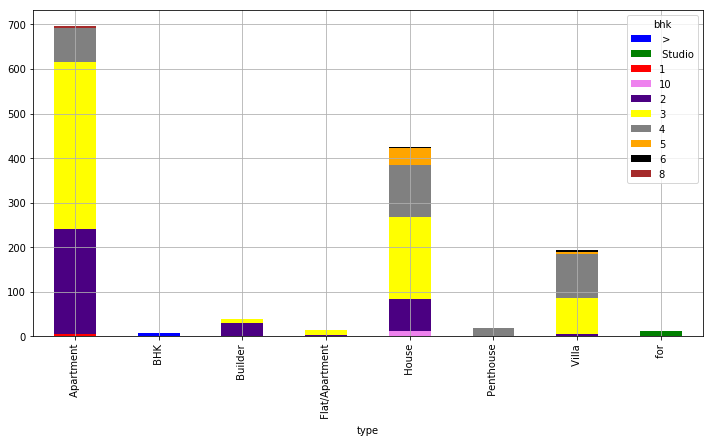

In [68]:
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True ,color=['blue','green','red','violet','indigo','yellow',
                                                      'grey','orange','black','brown'],grid=True,figsize = (12,6))

## Scatter plot for visualising the trends between 'square feet area' vs 'prices'
 we can clearly infer from this scatter plot that most of the houses
 - have areas between 1000-2000 sqft 
 - have prices in ranges close to (0.1-0.3)*10^8 rupees

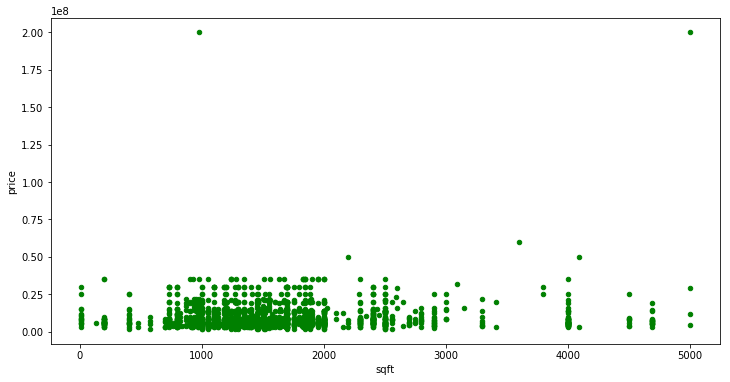

In [69]:
house_data.plot('sqft','price',kind='scatter',color='green',figsize = (12,6))

## check for any MISSING values
there is none

In [31]:
house_data.apply(lambda x:sum(x.isnull()))

id               0
sqft             0
bhk              0
type             0
neighbourhood    0
location         0
price            0
dtype: int64

# MODELLING
## LINEAR REGRESSION
Here we are taking only sqft as x axis and yaxis as price

In [32]:
#X_train['sqft'].values.reshape(len(X_train['sqft']),1)
#X_test['sqft'].values.reshape(len(X_test['sqft']),1)
#y_train.values.reshape(len(y_train),1)
#y_test.values.reshape(len(y_test),1)

In [33]:
def simple_linear_regression(input_feature,output):
    num=np.mean((input_feature*output),axis=0)-(np.mean(output,axis=0)*np.mean(input_feature,axis=0))
    den=np.mean((input_feature**2),axis=0) - (np.mean(input_feature,axis=0) * np.mean(input_feature,axis=0))
    slope=num/den
    intercept = output.mean(axis=0) - slope * (input_feature.mean(axis=0))
    return (intercept,slope)

In [34]:
sqft_living = X_train['sqft']
#price = y_train
sqft_living_list = [i for i in X_train['sqft']]
sqft_living_array = np.array(sqft_living_list)


price_list = [m for m in y_train]
price_list_array = np.array(price_list)
#squarefeet_intercept,squarfeet_slope = simple_linear_regression(sqft_living,price)
intercept_train,slope_train = simple_linear_regression(sqft_living_array, price_list_array)

In [35]:
print("intercept and slope resp.: %s, %s"%(intercept_train,slope_train))

intercept and slope resp.: 8775242.29399, 804.483313913


## Get any predictions from here

In [36]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + input_feature * slope
    return(predicted_output)

### If sqft =2650 , then what is the prediction for this

In [37]:
print(get_regression_predictions(2650,intercept_train,slope_train))

10907123.0759


## Metrics for fit of the line is RSS residual sum of squares

In [38]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS=np.sum(np.square((intercept+(slope*input_feature))-(output)),axis=0)   
    return(RSS)

In [39]:
print (get_residual_sum_of_squares(sqft_living,y_train,intercept_train,slope_train))

1.4449825308653994e+17


## USING sklearn's Linear Model to fit  model

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
dependent_var=y_train
independent_var=X_train.sqft

In [41]:
# initialize algorithms 
model=LinearRegression()
model.fit(independent_var.values.reshape((1410,1)),dependent_var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#make predictions
predict_train=model.predict(independent_var.values.reshape((1410,1)))
predict_test=model.predict(X_test.sqft.values.reshape((470,1)))

In [43]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 804.48331391]


In [44]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predict_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predict_test))


Mean squared error: 45661783339603.02
Variance score: -0.02


In [45]:
predict_test

array([  9740622.27068785,   9844400.61818267,  10786450.57877519,
        10135623.5778193 ,  10384208.92181852,  10142863.92764452,
        10706002.24738386,   9660173.93929652,  10706002.24738386,
         9800958.51923135,   9725337.0877235 ,  10119533.91154103,
         9559613.52505735,  12549878.00287323,   9434918.61140078,
         9619949.77360085,  10085745.61235667,  11108243.90434053,
         9579725.60790518,  10142863.92764452,  12069601.46446697,
         9857272.35120529,  10907123.07586219,  10384208.92181852,
         9418828.94512252,  10303760.59042719,   9773606.0865583 ,
         9499277.27651385,  11027795.57294919,   8936138.95677451,
        10142863.92764452,   9901518.93347052,  10135623.5778193 ,
         9097035.61955718,  11993175.5496452 ,  10042303.51340535,
         9507322.10965298,  10142863.92764452,  10295715.75728806,
         9362515.11314858,  10786450.57877519,  10223312.25903586,
         9418828.94512252,   8936138.95677451,  10384208.92181

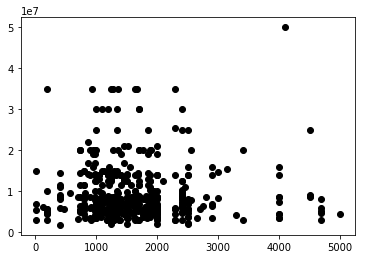

In [71]:
plt.scatter(X_test.sqft,y_test,  color='black')

## Plot for line fitted on train set

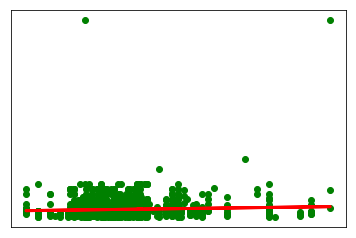

In [47]:
# Plot outputs
plt.scatter(X_train.sqft,y_train,  color='green')
plt.plot(X_train.sqft,predict_train, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## plot for line fitted on test set

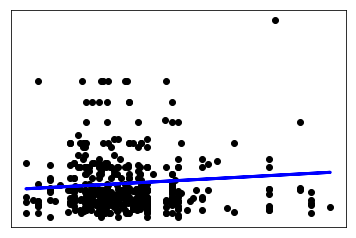

In [65]:
# Plot outputs
plt.scatter(X_test.sqft,y_test,  color='black')
plt.plot(X_test.sqft,predict_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## SUBMIT to csv file with comparison of actual price vs predicted price for test set

In [49]:
submission=pd.DataFrame()
submission['ID']=X_test.id
submission['actual_price'] = y_test
submission['predicted_price'] = predict_test
submission.to_csv('submission_test.csv', index = False)

## SUBMIT to csv file with comparison of actual price vs predicted price for train set

In [50]:
submission=pd.DataFrame()
submission['ID']=X_train.id
submission['actual_price'] = y_train
submission['predicted_price'] = predict_train
submission.to_csv('submission_train.csv', index = False)

# Map Neighbourhood analysis

In [72]:
dfneighbourhoodsum=house_data.groupby('neighbourhood').sum()

In [129]:
dfneighbourhoodsum[0:10]

,id,sqft,price
neighbourhood,,,
Abad Lotus Lake,3204,6655,26800000
Airport Greens,7,910,3350000
Alba Crest,7512,17353,54400000
Aluva,37780,72135,299000000
Alwaye,31,1250,6000000
Amrutha Retreat,38,1520,7600000
Angamali,51,841,3490000
Aqua City,23432,44306,84400000
Asset E Valley,34805,60904,192500000


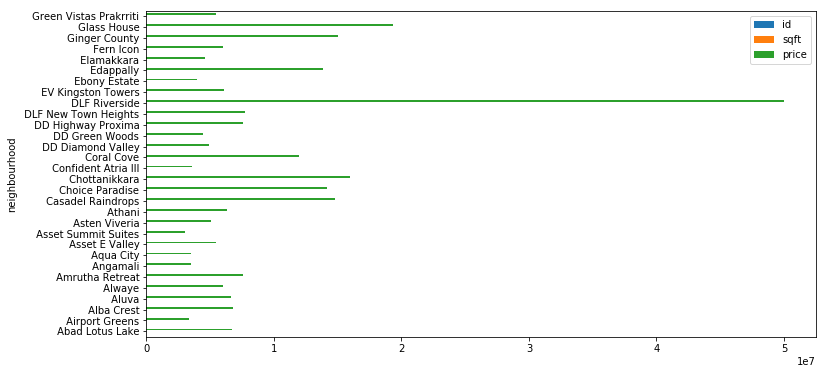

In [83]:
dfneighbourhoodmean[0:30].plot.barh(figsize = (12,6))

In [73]:
dfneighbourhoodmean=house_data.groupby('neighbourhood').mean()

In [79]:
dfneighbourhoodmean[0:10]

,id,sqft,price
neighbourhood,,,
Abad Lotus Lake,801.000000,1663.750000,6.700000e+06
Airport Greens,7.000000,910.000000,3.350000e+06
Alba Crest,939.000000,2169.125000,6.800000e+06
Aluva,839.555556,1603.000000,6.644444e+06
Alwaye,31.000000,1250.000000,6.000000e+06
Amrutha Retreat,38.000000,1520.000000,7.600000e+06
Angamali,51.000000,841.000000,3.490000e+06
Aqua City,976.333333,1846.083333,3.516667e+06
Asset E Valley,994.428571,1740.114286,5.500000e+06


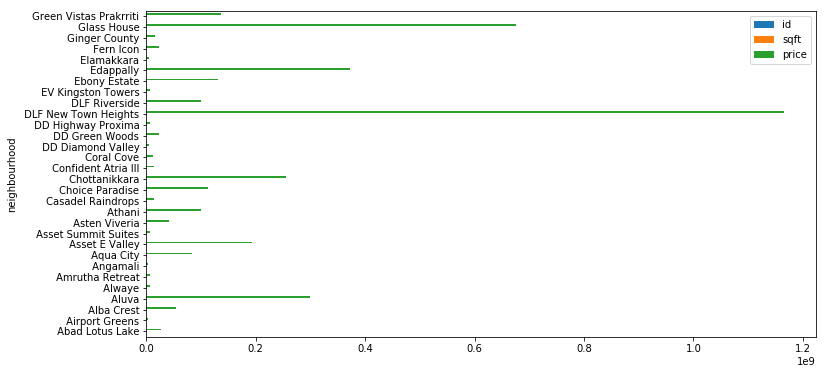

In [84]:
dfneighbourhoodsum[0:30].plot.barh(figsize = (12,6))

In [74]:
dflocationmean=house_data.groupby('location').mean()

In [94]:
dflocationmean

,id,sqft,price
location,,,
Aluva,900.295455,1710.522727,3.146591e+06
Alwaye,810.000000,1404.250000,6.200000e+06
Angamali,925.000000,2356.125000,9.000000e+06
Edappally,297.750000,2255.000000,8.175000e+06
Kadavanthra,817.954545,1859.136364,8.704091e+06
Kakkanad,943.996575,1618.863014,6.634760e+06
Kalamasery,535.000000,1040.000000,3.000000e+06
Kaloor,1012.419355,1839.290323,6.500000e+06
Kochi,943.252927,1640.116315,1.101184e+07


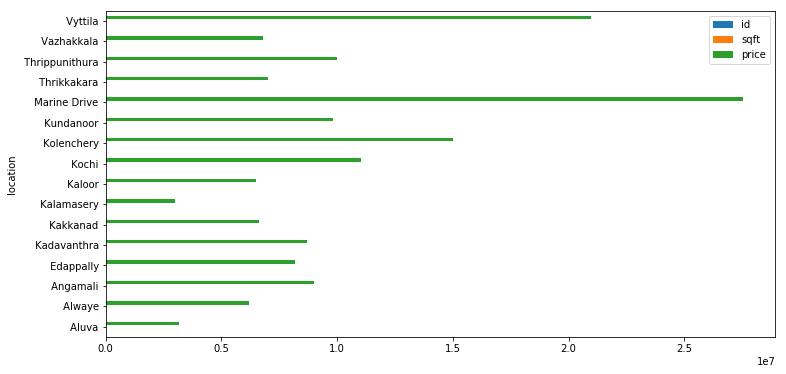

In [95]:
dflocationmean.plot.barh(figsize = (12,6))

In [75]:
dflocationsum=house_data.groupby('location').sum()

In [96]:
dflocationsum

,id,sqft,price
location,,,
Aluva,39613,75263,138450000
Alwaye,3240,5617,24800000
Angamali,7400,18849,72000000
Edappally,1191,9020,32700000
Kadavanthra,17995,40901,191490000
Kakkanad,275647,472708,1937350000
Kalamasery,1070,2080,6000000
Kaloor,31385,57018,201500000
Kochi,1208307,2100989,14106169995


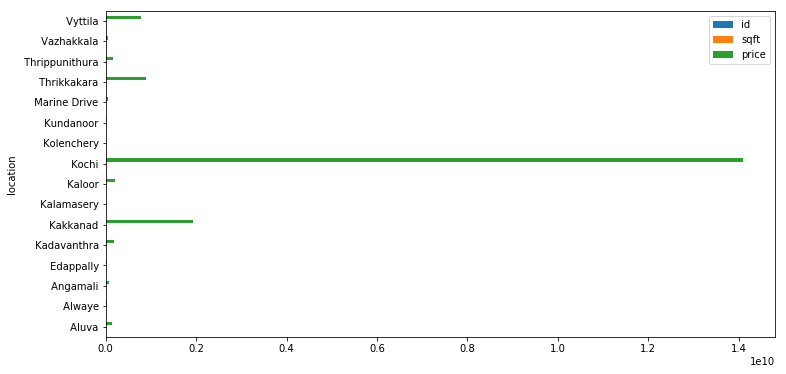

In [86]:
dflocationsum.plot.barh(figsize = (12,6))

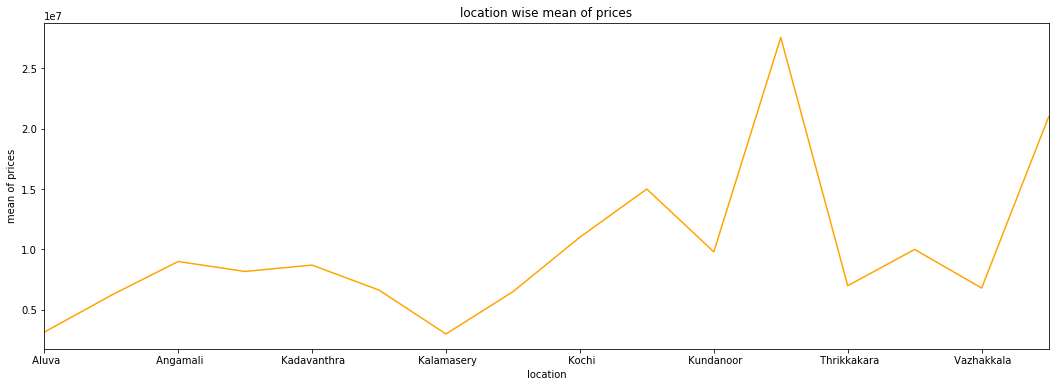

In [106]:
var=house_data.groupby('location').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('location')
ax1.set_ylabel('mean of prices')
ax1.set_title("location wise mean of prices")
var.plot(kind='line',figsize=(18,6),color='orange')

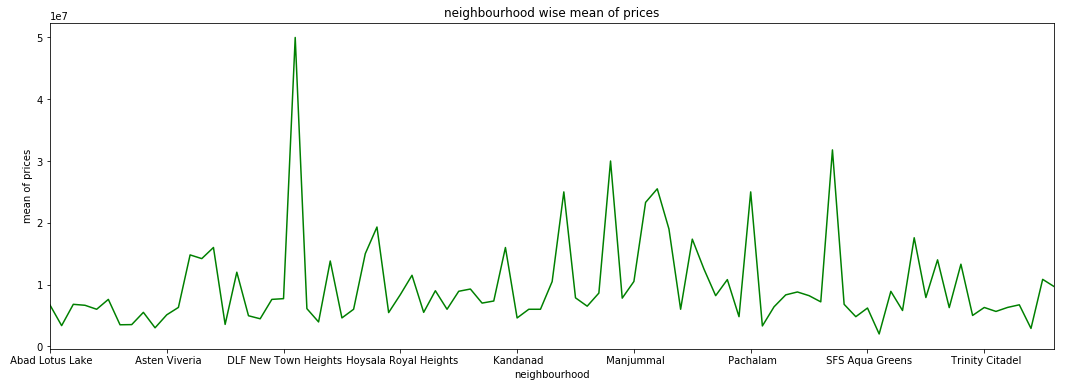

In [127]:
var=house_data.groupby('neighbourhood').price.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('neighbourhood')
ax1.set_ylabel('mean of prices')
ax1.set_title("neighbourhood wise mean of prices")
var.plot(kind='line',figsize=(18,6),color='green')